In [2]:
import numpy as np
c = np.array([299793,299792,299782])
s = np.array([2.0,4.5,25])/2
m=np.dot(c,1/s**2)/np.sum(1/s**2)
print(m)
print(np.sqrt(1/np.sum(1/s**2)))
print(np.sqrt(np.dot((c-m)**2,1/s**2)/np.sum(1/s**2)/2))


299792.7774532806
0.9113794376032194
0.6155367017876124


In [3]:
import pandas as pd

data = pd.read_csv("dat_1.2.csv",header=None,sep="\t")
data = data.to_numpy()
d = np.zeros((12,4))
for i in range(12):
    d[i,1:]=data[i,:]
data = d
S_x = np.dot(data[:,1],1/data[:,3]**2)
S_y = np.dot(data[:,2],1/data[:,3]**2)
S_xx = np.dot(data[:,1]**2,1/data[:,3]**2)
S_xy = 0
S = 0
for i in range(len(data[:,1])):
    S_xy += data[i,1]*data[i,2]/data[i,3]**2
    S += 1/data[i,3]**2
D = (S*S_xx-S_x**2)
a = (S_xx*S_y-S_x*S_xy)/D
b = (S*S_xy-S_x*S_y)/D
sig_a = (S_xx/D)
sig_b = S/D
sig_R = S*D**3/(S*S_xy-S_x*S_y)**4
sig_R2 = S_xx**3/S_xy**4
R2 = S_xx/S_xy
chi_sq= np.dot((data[:,2]-data[:,1]/R2)**2,1/data[:,3]**2)
# chi_sq = 0
# for i in range(12):
#     chi_sq += (data[i,2]-a-b*data[i,1])**2/data[i,3]**2
print(f"I_0={np.sqrt(sig_a)},R={np.sqrt(sig_R)},sig_I_0={np.sqrt(sig_R2)},sig_R={sig_R2}")
print(f"chi_sq={chi_sq}, normiertes chi_sq={chi_sq/(10)}")
data[:,2]-data[:,1]/R2

I_0=0.008250006732859033,R=0.04483888324348159,sig_I_0=0.0329238978905082,sig_R=0.0010839830523046102
chi_sq=81.96000181083537, normiertes chi_sq=8.196000181083537


array([-0.06208545, -0.04817091,  0.02374364, -0.01634182, -0.02942727,
        0.01948728, -0.02459818,  0.00131637,  0.05523091,  0.05614546,
        0.01006001,  0.10197455])

In [4]:
data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")


data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
with open("dattable_1.3.csv","w") as file:
    for i in range(10):
        if (i!=9):
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}\n")
        else:
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}")

[[0.17287505]]
[[5.78452478]]
[[1.]]
[[ 0.17287505 -0.04327971]
 [-0.04327971  0.03609785]]
[[ 8.26551308  9.90997906]
 [ 9.90997906 39.58409833]]
[[ 1.00000000e+00 -3.56957458e-18]
 [ 1.10245914e-16  1.00000000e+00]]
[[ 0.17287505 -0.04327971  0.03609785]
 [-0.04327971  0.03609785 -0.01705659]
 [ 0.03609785 -0.01705659  0.01741709]]
[[ 10.5464441    4.31172297 -17.63558982]
 [  4.31172297  53.32430837  43.28432004]
 [-17.63558982  43.28432004 136.3539826 ]]
[[ 1.00000000e+00 -1.47034110e-17  4.00922152e-17]
 [-4.60811153e-18  1.00000000e+00  1.26381502e-18]
 [ 7.13207110e-18  3.24235194e-17  1.00000000e+00]]
[[ 0.17287505 -0.04327971  0.03609785 -0.01705659]
 [-0.04327971  0.03609785 -0.01705659  0.01741709]
 [ 0.03609785 -0.01705659  0.01741709 -0.00978213]
 [-0.01705659  0.01741709 -0.00978213  0.01086898]]
[[  13.13359333   20.80679941  -28.29905565  -38.20087548]
 [  20.80679941  158.49317273  -24.70351838 -243.56011352]
 [ -28.29905565  -24.70351838  180.30564264  157.45273798]
 

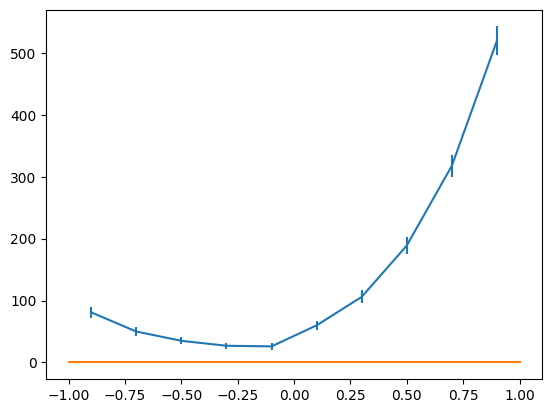

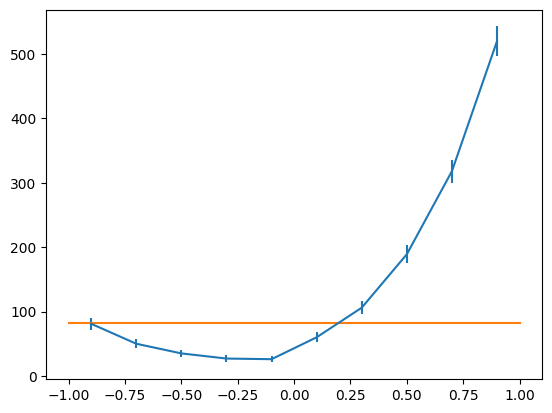

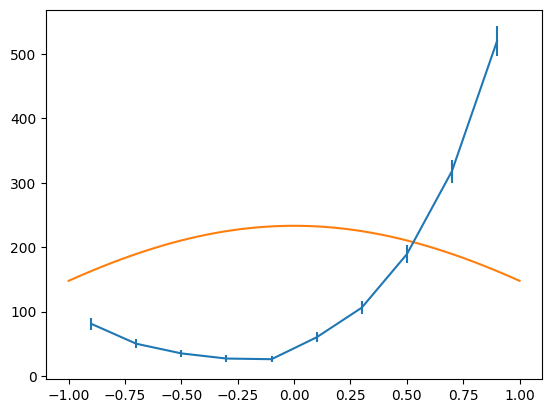

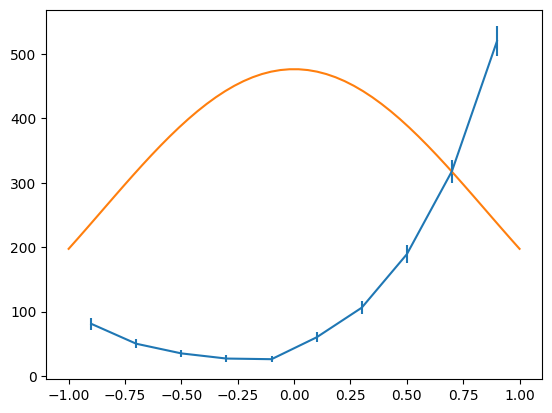

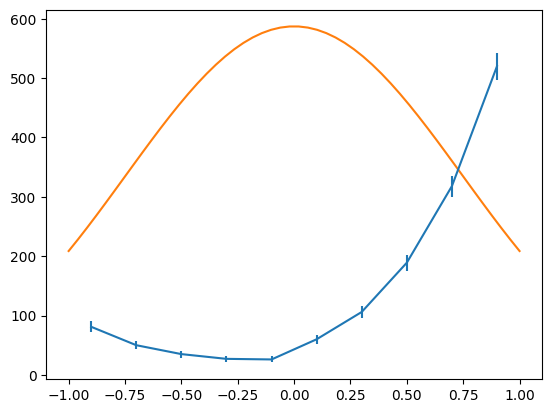

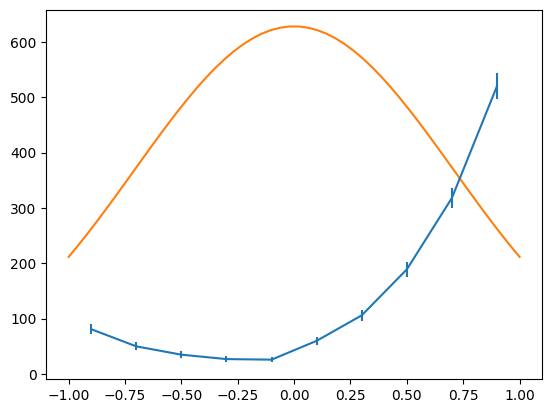

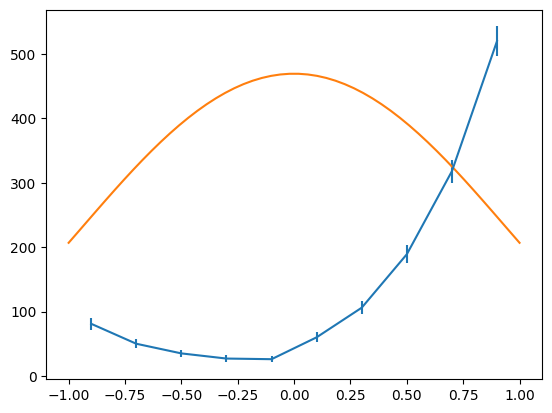

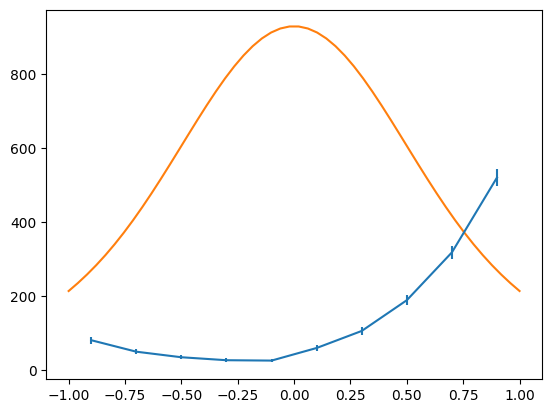

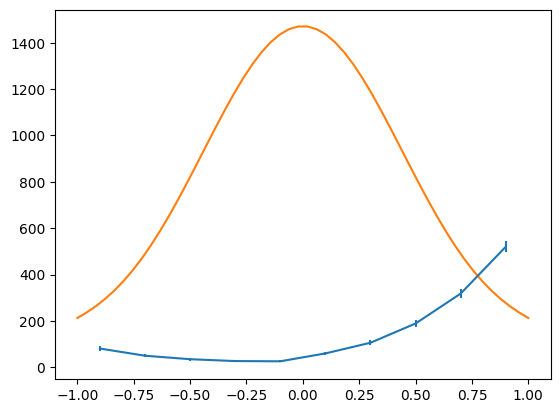

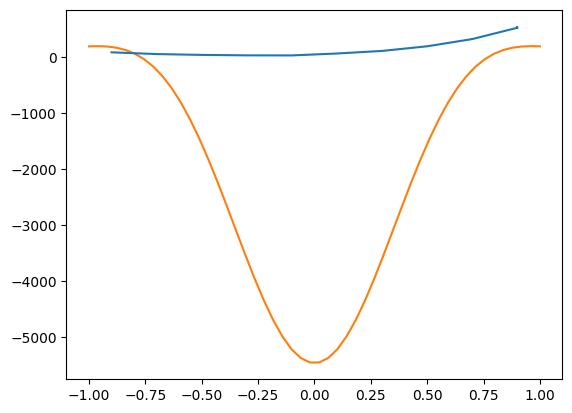

In [56]:
import matplotlib.pyplot as plt
import sympy as sym

data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")
import scipy.linalg as lin

data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
with open("dattable_1.3.csv","w") as file:
    for i in range(10):
        if (i!=9):
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}\n")
        else:
            file.write(f"{data3[i,1]}\t{data3[i,2]}\t{data3[i,0]}")
param = []
for n in range(1,11):
    A = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            A[i,j]=np.dot(data3[:,1]**(i+j),1/data3[:,0]**2)
            # A[i,j]+=data3[k,1]**(i+j)/data3[k,0]**2
        for k in range(10):
            b[i] += data3[k,1]**i*data3[k,2]/data3[k,0]**2
    print(A)
    print(lin.inv(A))
    print(np.matmul(lin.inv(A),A))
    param.append(np.matmul(lin.inv(A),b))
    
print(param)
x = np.linspace(-1,1)
for n in range(10):
    y = np.zeros_like(x)
    for i in range(n):
        y += param[n][i]*np.cos(x)**i
    fig, ax = plt.subplots(1,1)
    plt.errorbar(data3[:,1],data3[:,2],data3[:,0],linestyle=None)
    ax.plot(x,y)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import sympy as sym

data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")
import scipy.linalg as lin

data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
param = []

solution_0 = []
det = np.zeros(10)
for n in range(1,11):
    A = np.zeros((n,n))
    Null = sym.matrices.zeros(n,1)
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            for k in range(10):
                A[i,j]+=data3[k,1]**(i+j)/data3[k,0]**2
        for k in range(10):
            b[i] += data3[k,1]**i*data3[k,2]/data3[k,0]**2
    a = sym.matrices.Matrix(A)
    c = sym.matrices.Matrix(b)
    
    det[n-1]= a.det()
    solution_0.append(a.LUsolve(Null))
    param.append(a.LUsolve(c))
print(solution_0)
print(det)  
print(param)
x = np.linspace(-np.pi+0.35,0-0.35)
chi_sq = np.zeros(10)

for n in range(1,11):
    
    y = np.zeros_like(x)
    for i in range(n):
        y += np.array(param[n-1]).astype('float64')[i]*np.cos(x)**i
    fn = np.zeros(10)
    for k in range(10):
        for i in range(n):
            fn[k] += np.array(param[n-1]).astype('float64')[i]*data3[k,1]**i
    chi_sq[n-1] = (np.dot((data3[:,2]-fn)**2,1/data3[:,0]**2))
    
    fig, ax = plt.subplots(1,1)
    plt.errorbar((np.arccos(data3[:,1])-np.pi)[::-1],data3[:,2],data3[:,0],linestyle='none')
    ax.plot(x,y)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("N")
    plt.savefig(f"cosfit_{n-1}.png")
    plt.show()
print(chi_sq)
norm = 10 -np.arange(1,11)
chi_sq/norm
with open("result_cosfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}")
        for i in range(len(param[n])):
            file.write(f"\t{param[n][i]}")
        for j in range(9-n):
            file.write("\t0")
        if (n!=9):
            file.write("\n")

In [13]:
with open("chi_cosfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}\t")
        file.write("{}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/852699371.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  file.write("{}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))


[Matrix([[57.8452477523616]]), Matrix([
[82.6551307957833],
[ 99.099790607275]]), Matrix([
[138.471076038774],
[185.955485825497],
[ 182.40816294162]]), Matrix([
[141.955071050893],
[209.097551825508],
[208.012042789867],
[55.0341122234623]]), Matrix([
[142.301243073574],
[210.248291182585],
[ 214.38385582198],
[ 60.763904085811],
[12.0228438161985]]), Matrix([
[142.321035313718],
[210.495723049644],
[214.639101145822],
[62.0635941307936],
[13.0055988951517],
[2.12436581686236]]), Matrix([
[143.102017799079],
[211.072322919555],
[218.719361417046],
[64.6974536603022],
[25.0661219750136],
[ 8.6737521612441],
[15.0230247493569]]), Matrix([
[ 142.941735469637],
[ 208.751341565018],
[ 217.695847624183],
[ 58.7526531215309],
[ 22.7333838227178],
[-2.08920373976619],
[ 10.9253134158365],
[ -10.404400833908]]), Matrix([
[  140.88500547823],
[ 207.529630958836],
[ 206.801125920773],
[ 55.6724155813226],
[ 2.93974590540259],
[-7.27346555638653],
[-14.8852852886082],
[-16.2558368533172],
[-18.18

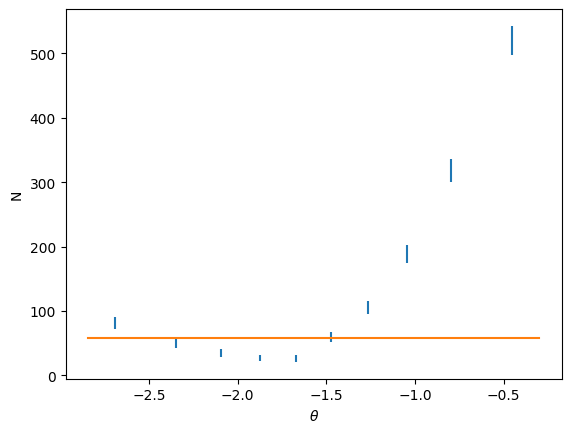

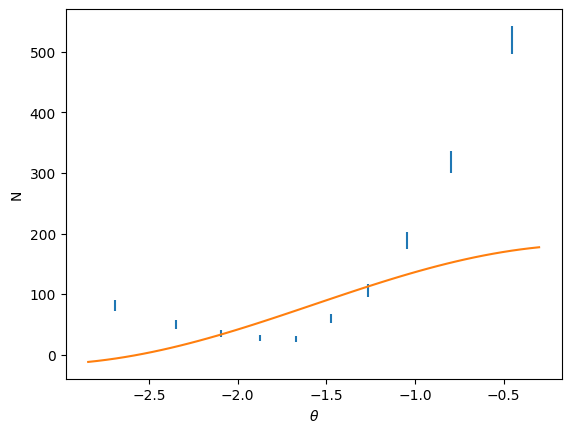

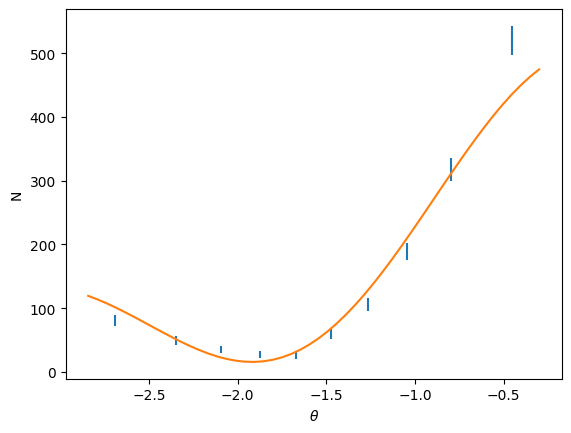

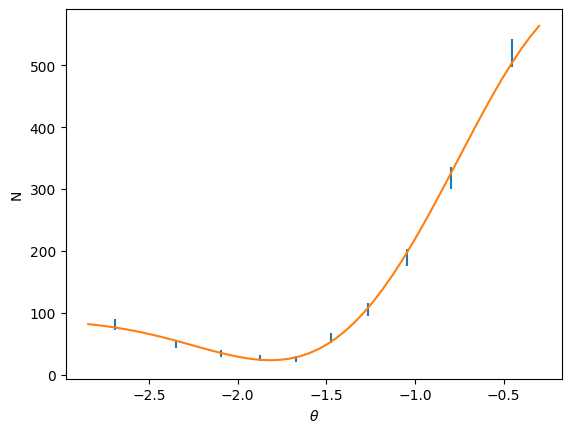

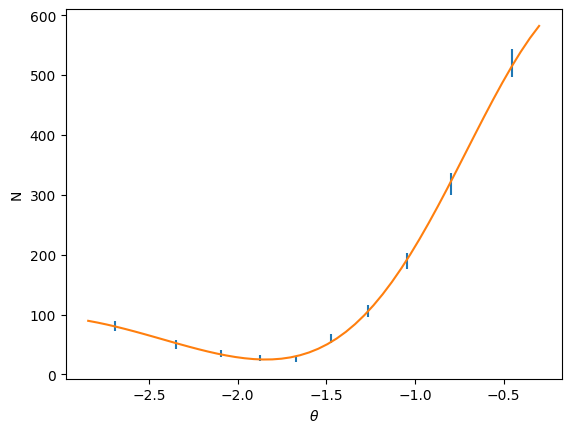

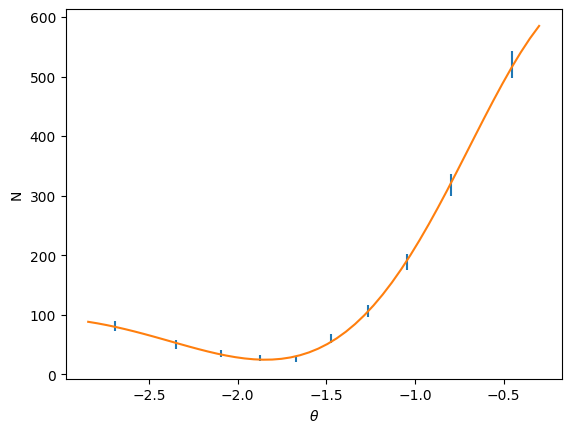

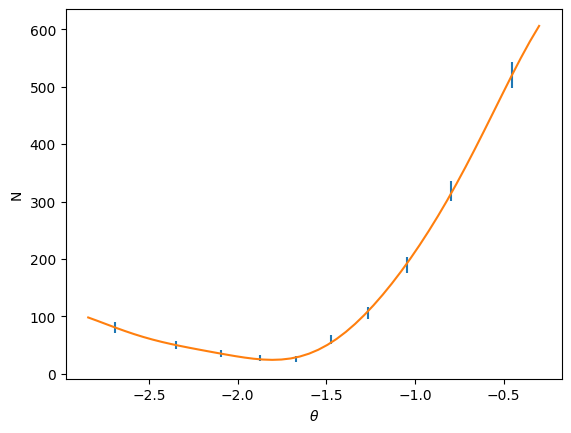

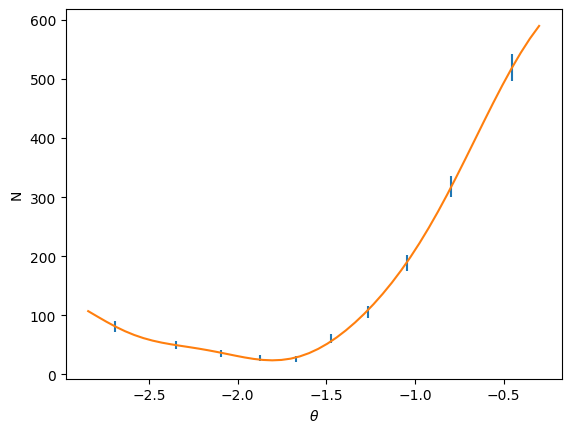

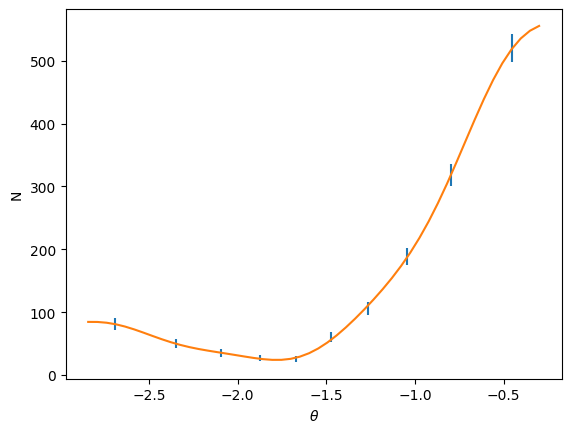

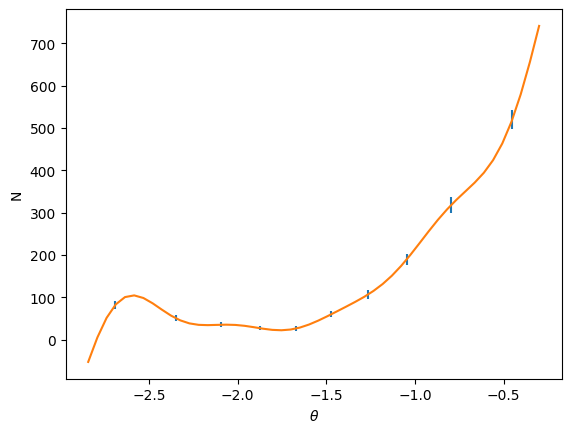

[8.33547522e+02 5.85448692e+02 3.64096478e+01 2.84989163e+00
 1.68602272e+00 1.66264864e+00 9.35496748e-01 7.68438971e-01
 5.66188874e-01 7.80048957e-27]


/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/366947126.py:52: RuntimeWarning: divide by zero encountered in divide
  chi_sq/norm


In [14]:
import matplotlib.pyplot as plt
import sympy as sym

data3 = pd.read_csv("dat_1.3.csv",header=None,sep="\t")
import scipy.linalg as lin
import scipy.special as sc

data3 = data3.to_numpy()
data3[:,0]=np.sqrt(data3[:,2])
ang = (np.arccos(data3[:,1])-np.pi)[::-1]
param = []
for n in range(1,11):
    A = np.zeros((n,n))

    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            for k in range(10):
                A[i,j]+=sc.legendre(i)(data3[k,1])*sc.legendre(j)(data3[k,1])/data3[k,0]**2
        for k in range(10):
            b[i] += sc.legendre(i)(data3[k,1])*data3[k,2]/data3[k,0]**2
    a = sym.matrices.Matrix(A)
    c = sym.matrices.Matrix(b)
    
    
   
    param.append(a.LUsolve(c))
    
print(param)
x = np.linspace(-np.pi+0.3,-0.3)
chi_sq = np.zeros(10)

for n in range(1,11):
    
    y = np.zeros_like(x)
    for i in range(n):
        y += np.array(param[n-1]).astype('float64')[i]*sc.legendre(i)(np.cos(x))
    fn = np.zeros(10)
    for k in range(10):
        for i in range(n):
            fn[k] += np.array(param[n-1]).astype('float64')[i]*sc.legendre(i)(np.cos(ang[k]))
    chi_sq[n-1] = (np.dot((data3[:,2]-fn)**2,1/data3[:,0]**2))
    
    fig, ax = plt.subplots(1,1)
    plt.errorbar((np.arccos(data3[:,1])-np.pi)[::-1],data3[:,2],data3[:,0],linestyle='none')
    ax.plot(x,y)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel("N")
    plt.show()
print(chi_sq)
norm = 10 -np.arange(1,11)
chi_sq/norm
with open("result_lpfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}")
        for i in range(len(param[n])):
            file.write(f"\t{param[n][i]}")
        for j in range(9-n):
            file.write("\t0")
        if (n!=9):
            file.write("\n")

In [18]:
with open("chi_lpfit.csv","w") as file:
    for n in range(10):
        file.write(f"{n}\t")
        file.write("{:.3}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))

/var/folders/ch/3xykztb11m7_dgk_2xh5mvlc0000gp/T/ipykernel_1100/812642917.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  file.write("{:.3}\t{:.3}\n".format(chi_sq[n],chi_sq[n]/norm[n]))


Matrix([[0], [1.00000000000000], [0]])
[[1.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-40]]


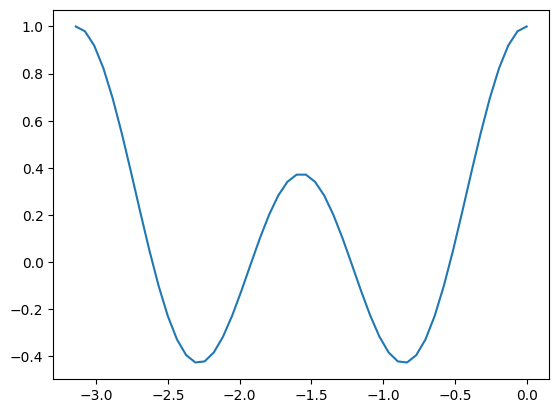

In [20]:
import sympy as sym
import scipy.special as sc
a = np.array(([1,0,0],[0,1,0],[0,0,10**(-40)]))
a= sym.matrices.Matrix(a)
b = sym.matrices.Matrix(3,1,[0,1,0])
print(a.LUsolve(b))
a= np.array(a)
a= a.astype('float64')
print(a)
type(a[2,2])
f =sc.legendre(4)
fig, ax = plt.subplots(1,1)
x = np.linspace(-np.pi,0)
y = sc.legendre(4)(np.cos(x))
ax.plot(x,y)
plt.show()

 final_simplex: (array([[5.04608492e+03, 2.82769997e-02, 5.22591902e+03, 4.25772843e-03,
        1.95611357e-12],
       [5.04608487e+03, 2.82770000e-02, 5.22591907e+03, 4.25772848e-03,
        2.08371703e-12],
       [5.04608492e+03, 2.82769999e-02, 5.22591905e+03, 4.25772843e-03,
        2.03477027e-12],
       [5.04608490e+03, 2.82769998e-02, 5.22591903e+03, 4.25772844e-03,
        2.18628680e-12],
       [5.04608499e+03, 2.82769994e-02, 5.22591898e+03, 4.25772841e-03,
        2.82128380e-12],
       [5.04608493e+03, 2.82769996e-02, 5.22591902e+03, 4.25772842e-03,
        1.87433790e-12]]), array([134.15695932, 134.15695932, 134.15695932, 134.15695932,
       134.15695932, 134.15695932]))
           fun: 134.1569593160475
       message: 'Optimization terminated successfully.'
          nfev: 2129
           nit: 1342
        status: 0
       success: True
             x: array([5.04608492e+03, 2.82769997e-02, 5.22591902e+03, 4.25772843e-03,
       1.95611357e-12])


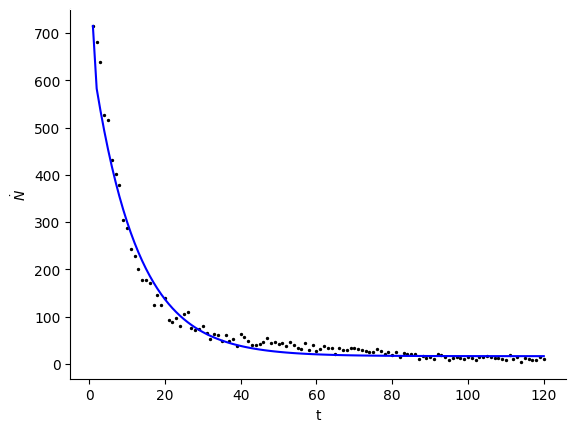

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
l1 = np.log(2)/(3600*24*41)
l2= np.log(2)/(3600*24*462.6)
dat = pd.read_csv("ag_decay.txt",header=None,sep='\t')
data = dat.to_numpy()
# print(data[:,1])
dev = np.sqrt(data[:,1])
v = np.array([1000.000000   ,  0.292074   ,     1000.000000    , 0.292136    ,    23.629538])
vi =np.array([3457.329590   ,  299510784.000000   ,     0.758543    ,    3.567377   ,     3.162205])
vu = np.array([7491.150757,     0.017192    ,    81.765198     ,  4.840988    ,    16.202220])
model_res = np.zeros(120)
for i in range(120):
    model_res[i]= vu[0]*np.exp(-vu[1]*i*5)*(1-np.exp(-vu[1]*5))+vu[2]*np.exp(-vu[3]*i*5)*(1-np.exp(-vu[3]*5))+vu[4]
model = np.zeros(120)
def func(v):
    result =0
    for i in range(120):
        result += (v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]-data[i,1])**2/dev[i]**2
    return result
x_0 = np.array([1000,0.025,1,0.024,25]) 
bs = [(0,30000),(0,20),(0,30000),(0,20),(0,10000)] 
opt ={"maxiter":2000}#,"xatol":1/10*15}
res = minimize(func,x_0,method='Nelder-Mead',bounds=bs,options=opt)
v = res.x
print(res)  
for i in range(120):
    model[i]= v[0]*np.exp(-v[1]*i*5)*(1-np.exp(-v[1]*5))+v[2]*np.exp(-v[3]*i*5)*(1-np.exp(-v[3]*5))+v[4]
model2 = np.zeros(120)
for i in range(120):
    model2[i]= vi[0]*np.exp(-vi[1]*i*5)+vi[2]*vi[2]+vi[3]*vi[3]+vi[4]*vi[4]
plt.figure(facecolor="white")
ax = plt.axes()
ax.set_facecolor("white")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.ticklabel_format(style='scientific',scilimits=(-3,3))
ax.tick_params(axis='y', colors='black')
ax.set_xlabel('t')
ax.set_ylabel(r"$\dot{N}$")
ax.scatter(data[:,0],data[:,1],s=2,color="black")
# ax.plot(data[:,0],model,color='blue')
ax.plot(data[:,0],model_res,color='blue')
plt.show()

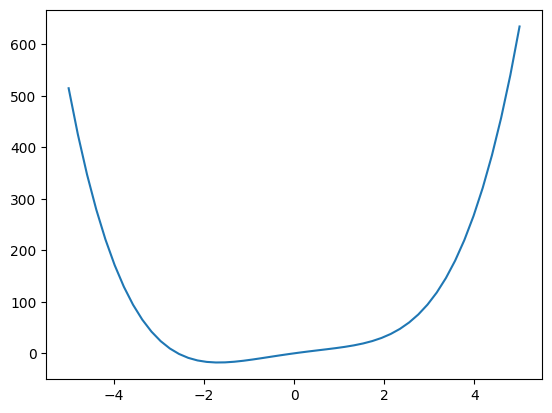

In [13]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5)
y = x**4-2*x**2+12*x
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
plt.show()

In [22]:
from scipy.optimize import minimize
def func(x):
    return (x[0]*x[0]*x[0]*x[0]-x[1]*x[0]*x[0]-3*x[0]*x[1]*x[1]+x[1]**4)
def d_func(x,grad):
  grad[0] = 4*x[0]*x[0]*x[0]-2*x[1]*x[0]-3*x[1]*x[1]
  grad[1]= -x[0]*x[0]-6*x[1]*x[0]+4*x[1]*x[1]*x[1]

x_0 = np.array([56,88])
minimize(func,x_0)
func([ 1.444460   ,     1.580127])

-3.5291163463094755

In [55]:
import numpy as np
import matplotlib.pyplot as plt
(3+np.cos(1/2)**2)**2/np.sin(1/2)**4/2**2
1/0.13**3

455.1661356395084